# Star Wars Survey

#### Data Cleaning and Data Exploration

Project to show data cleaning steps using survey data collected by the team at FiveThirtyEight. The survey data is available here:

https://github.com/fivethirtyeight/data/tree/master/star-wars-survey



In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# increasing the number of columns to display by default to 50
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

In [3]:
# read our data; we need to specify the type of encoding since there are special characters in the dataset
# there are characters the default encoder, utf-8, can't decode at the end of cell 'AF' in row 1 that need to be deleted first if you want to use UTF-8 to decode
df = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')

In [4]:
# our dataset has 1187 records and 38 columns
df.shape

(1187, 38)

In [5]:
# the columns have mostly categorical responses
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [6]:
# there are a good amount of nulls in the dataset and there are columns with no names that seem to correspond to additional movies respondents have seen
df.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [7]:
# removing records where the RespondentID is null
df = df[pd.notnull(df['RespondentID'])]

In [8]:
# confirming there are no null values in the RespondentID col
df['RespondentID'].isnull().any()

False

In [9]:
# let's examing responses to the first two questions
df.iloc[:1,1:3].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,Yes,Yes


In [10]:
df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [12]:
# we will map our Yes/No answers to True/False values using a dictionary
yes_no = {
    'Yes': True,
    'No': False
}

In [13]:
# now we will replace our yes_no values with our dictionary values using mapping
df['Have you seen any of the 6 films in the Star Wars franchise?'] = df['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [14]:
# our data now only contains True/False values
df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [15]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [16]:
df.sample(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
573,3.290196e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,2,1,3,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Greedo,No,NaN,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,West North Central
1109,3.288512e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts()

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [18]:
df.shape

(1186, 38)

The unamed columns are all movie titles that the respondent either checked off as seen or not.  The name of the film is populated if they saw the film. We need to convert these values to True/False and upate the name of the columns.

In [19]:
# renaming the columns
df.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'}, inplace=True)

In [20]:
# dictionary to use when to map values to True/False
# spaces are crucial here; there are some spaces after the Episode number in most titles
seen = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,    
    np.NaN: False
}

In [21]:
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [22]:
df['seen_1'] = df['seen_1'].map(seen)
df['seen_2'] = df['seen_2'].map(seen)
df['seen_3'] = df['seen_3'].map(seen)
df['seen_4'] = df['seen_4'].map(seen)
df['seen_5'] = df['seen_5'].map(seen)
df['seen_6'] = df['seen_6'].map(seen)

In [23]:
# our movie seen columns now only contain True/False values
df['seen_1'].value_counts()

True     673
False    513
Name: seen_1, dtype: int64

The next set of columns contain the respondent's rank of the 6 movies from 1 to 6. We need to rename the columns and convert the values to numbers.

In [24]:
df.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [25]:
# converting our rank values to integers
df[df.columns[9:15]] = df[df.columns[9:15]].astype(float)

In [26]:
# renaming the columns to something more intuative
df.rename(columns= {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10': 'rank_2',
    'Unnamed: 11': 'rank_3',
    'Unnamed: 12': 'rank_4',
    'Unnamed: 13': 'rank_5',
    'Unnamed: 14': 'rank_6',
}, inplace=True)

In [27]:
df.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [28]:
mov_ranking = df[df.columns[9:15]].mean()
mov_ranking = mov_ranking.reset_index()

In [29]:
mov_ranking.head(1)

,index,0
0,rank_1,3.732934


In [30]:
mov_ranking.rename(columns={'index':'rank', 0:'mean'}, inplace=True)

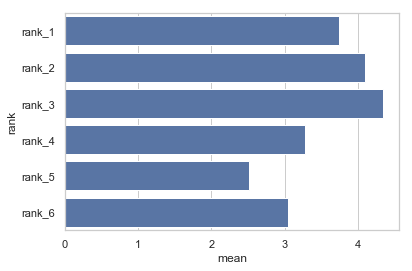

In [31]:
sns.barplot(x=mov_ranking['mean'], y=mov_ranking['rank'], color='b')

The respondents ranked movie 3 in the series the highest, 'Star Wars: Episode III  Revenge of the Sith', and the first three more than the last three overall. The rankings for the first 3 are significantly higher than the last 3.

In [32]:
# Exploring the movies seen data that we converted to True/False values
mov_seen = df[df.columns[3:9]].sum()
mov_seen = mov_seen.reset_index()

In [33]:
mov_seen.head(1)

,index,0
0,seen_1,673


In [34]:
mov_seen.rename(columns={'index':'movie', 0:'total'}, inplace=True)

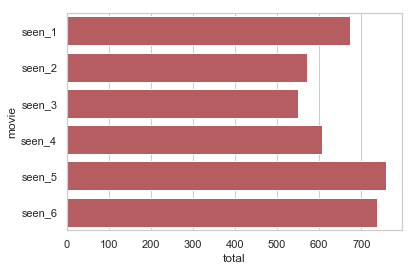

In [35]:
sns.barplot(x=mov_seen['total'], y=mov_seen['movie'], color='r')

Most peeople saw the last 2 movies the most and the first movie. The movie seen the most is also the movie rated the least, 'Star Wars: Episode V The Empire Strikes Back'. 

In [36]:
# exploring our data based on gender and fan segments
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

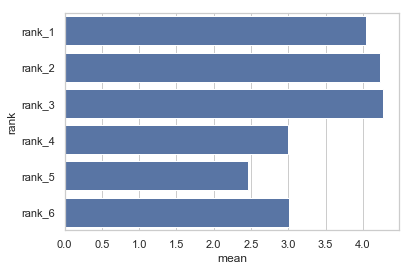

In [37]:
# moving ranking for males
mov_ranking = males[males.columns[9:15]].mean()
mov_ranking = mov_ranking.reset_index()
mov_ranking.rename(columns={'index':'rank', 0:'mean'}, inplace=True)
sns.barplot(x=mov_ranking['mean'], y=mov_ranking['rank'], color='b')

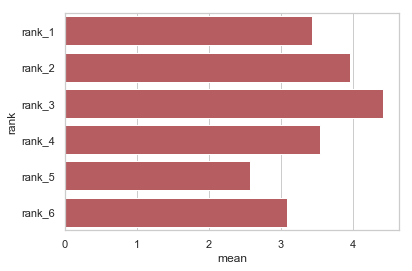

In [38]:
# moving ranking for females
mov_ranking = females[females.columns[9:15]].mean()
mov_ranking = mov_ranking.reset_index()
mov_ranking.rename(columns={'index':'rank', 0:'mean'}, inplace=True)
sns.barplot(x=mov_ranking['mean'], y=mov_ranking['rank'], color='r')

Males ranked the first 3 movies significantly higher than the last 3. The ranking between the first three movies was very similar. Females also ranked movie 2 and 3 highest and there was a lot more variation in ranking for each movie.

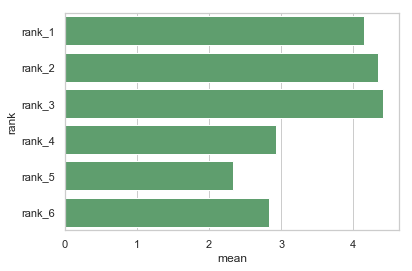

In [39]:
# rankings based on fans
fan = df[df['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
fan = fan[fan.columns[9:15]].mean()
fan = fan.reset_index()
fan.rename(columns={'index':'rank', 0:'mean'}, inplace=True)
sns.barplot(x=fan['mean'], y=fan['rank'], color='g')

The ranking for fans is almost identical to the ranking by females

In [40]:
fan.shape

(6, 2)

In [41]:
df[df['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True].shape

(552, 38)

In [42]:
df.shape

(1186, 38)

In [43]:
fans = round((552/1186) * 100,1)
print('Percent of fans =: ',fans,'%')

Percent of fans =:  46.5 %


In this project I demonstrated some common data cleaning techniques as well as displayed some initial data exploration visualizations.